In [126]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten



In [127]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [128]:
timeseries_data=[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [129]:
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [130]:
print(X,y)

[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]
 [50 60 70]
 [60 70 80]] [40 50 60 70 80 90]


In [131]:
X.shape

(6, 3)

In [132]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [133]:
X.shape

(6, 3, 1)

In [134]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 4485.2964
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 4471.6250
Epoch 3/300
1/1 [==============================] - 0s 37ms/step - loss: 4458.5776
Epoch 4/300
1/1 [==============================] - 0s 18ms/step - loss: 4445.2402
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 4431.3599
Epoch 6/300
1/1 [==============================] - 0s 19ms/step - loss: 4416.6953
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 4400.9497
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 4383.5649
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 4364.5464
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 4343.6294
Epoch 11/300
1/1 [==============================] - 0s 15ms/step - loss: 4320.4214
Epoch 12/300
1/1 [==============================] - 0s 12ms/step - loss: 4294.4316
Epoch 13/300
1/

1/1 [==============================] - 0s 17ms/step - loss: 0.9876
Epoch 203/300
1/1 [==============================] - 0s 14ms/step - loss: 0.9761
Epoch 204/300
1/1 [==============================] - 0s 15ms/step - loss: 0.9647
Epoch 205/300
1/1 [==============================] - 0s 14ms/step - loss: 0.9533
Epoch 206/300
1/1 [==============================] - 0s 13ms/step - loss: 0.9420
Epoch 207/300
1/1 [==============================] - 0s 10ms/step - loss: 0.9308
Epoch 208/300
1/1 [==============================] - 0s 11ms/step - loss: 0.9197
Epoch 209/300
1/1 [==============================] - 0s 10ms/step - loss: 0.9087
Epoch 210/300
1/1 [==============================] - 0s 17ms/step - loss: 0.8977
Epoch 211/300
1/1 [==============================] - 0s 13ms/step - loss: 0.8868
Epoch 212/300
1/1 [==============================] - 0s 10ms/step - loss: 0.8760
Epoch 213/300
1/1 [==============================] - 0s 17ms/step - loss: 0.8652
Epoch 214/300
1/1 [=======================

In [135]:
# demonstrate prediction
x_input = array([70, 80, 90])
temp_input=list(x_input)
lst_output=[]
i=0

In [ ]:
while(i<50):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

In [158]:
lst_output

[102.70757,
 115.615036,
 130.11507,
 147.49893,
 166.63498,
 188.897,
 215.02238,
 244.8769,
 279.7765,
 320.4693,
 367.60257,
 422.6706,
 486.9137,
 561.9061,
 649.91064,
 753.4213,
 875.7163,
 1021.0307,
 1194.4054,
 1402.117,
 1652.0131,
 1953.6384,
 2318.125,
 2757.2102,
 3284.7551,
 3923.4788,
 4695.945,
 5625.972,
 6746.408,
 8093.5513,
 9710.7,
 11652.597,
 13982.991,
 16779.06,
 20134.668,
 24161.062,
 28992.385,
 34789.984,
 41746.637,
 50094.227,
 60111.043,
 72130.56,
 86553.39,
 103860.09,
 124627.125,
 149546.52,
 179448.5,
 215329.27,
 258384.33,
 310048.12]

In [159]:
timeseries_data

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [160]:
len(timeseries_data)

9

In [161]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,60)

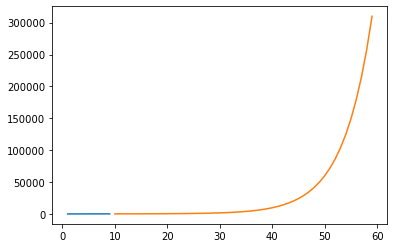

In [162]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
plt.show()